# **Library imports**

In [20]:
import pandas as pd
from pandas.plotting import parallel_coordinates
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# **File imports**

In [2]:
# folder for txt files
folder = 'qws1_dataset/*.txt'

# list of files
files = glob.glob(folder)

# number of files
count = 1
for file in files:
    print(f'File number {count} - {file}')
    count += 1

File number 1 - qws1_dataset\qws1.txt


## File listing

- List the total number of files, convert them into Dataframes and append them in a python list;
- Verify the first few rows and data types

In [3]:
df_list = []

for file in files:
    try:
        df_list.append(pd.read_csv(file, sep=','))
    except Exception as e:
        print(f"Skipping {file}: {e}")

if df_list:
    df = pd.concat(df_list, ignore_index=True)
    print(df.shape)
else:
    print("No valid files")

df.head()

(364, 13)


,Response Time,Availability,Throughput,Successability,Reliability,Compliance,Best Practices,Latency,Documentation,WsRF: Web Service Relevancy Function (%),Class: levels representing service offering qualities (1 through 4),Service Name,WSDL Address
0,45.00,83,27.2,50,97.4,89,91,43.00,58,100,1,DictionaryService,http://www.mindswap.org/2002/services/Dictiona...
1,71.75,100,14.6,88,85.5,78,80,64.42,86,93,1,MyService,http://mydispatch.com/myservice.asmx?wsdl
2,117.00,100,23.4,83,88.0,100,87,111.00,59,90,1,aba,http://www.quentinsagerconsulting.com/wsdl/aba...
3,70.00,100,5.4,83,79.3,100,75,63.00,91,90,1,AlexaWebSearch,http://wsearch.amazonaws.com/doc/2007-03-15/We...
4,105.20,100,18.2,80,92.2,78,84,104.60,91,90,1,ErrorMailer,http://www.errormail.net/EM/ErrorMailer.asmx?wsdl


In [4]:
df_numerical = df.select_dtypes(include='number')
df_categorical = df.select_dtypes(include='object')

# **Graphical Exploration**

## Histograms for numerical columns

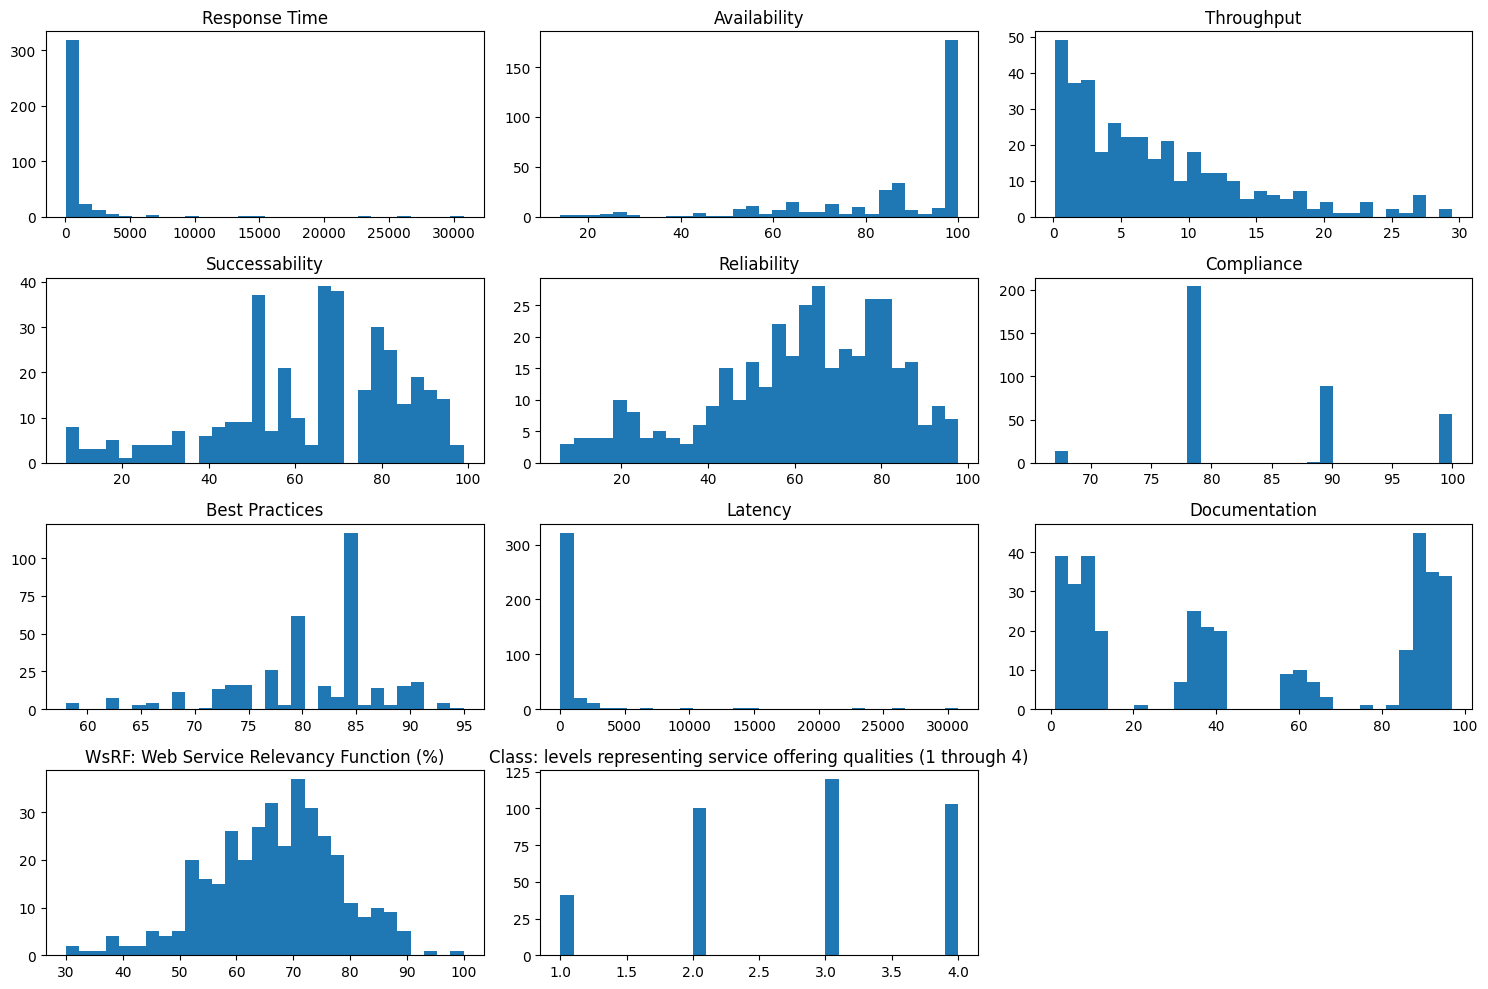

In [5]:
# Plot histograms numeric columns
df_numerical.hist(bins=30, figsize=(15, 10), grid=False)
plt.tight_layout() 

**Key Findings:**

**1 Response Time e Latency:**
- Extreme right skew (long tail)
- Values concentrated near 0, but a few very large outliers exist

Implication - There are services with very high delays—potential performance bottlenecks

**2 Avaiability:**
- Almost all values are near 100%, with very few lower values

Implication - Most services are highly available, so this feature has low variance and may have limited predictive power.

**3 Throughput:**
- Right-skewed distribution, most values between 0–10

Implication - Throughput varies but is generally low; could indicate resource constraints

**4 Successability, Reliability, Best Practices, WsRF:**
- These look approximately normal or slightly skewed, centered around 50–80

Implication - These features have good spread and may be useful for modeling

**5 Compliance & Documentation:**
- Compliance has few distinct peaks
- Documentation shows clusters, possibly indicating different service tiers

Implication - These might represent discrete quality levels rather than continuous metrics

**6 Class (Service Quality Levels):**
- Only 4 distinct values (1–4)

Implication - This is your target or grouping variable; treat as categorical

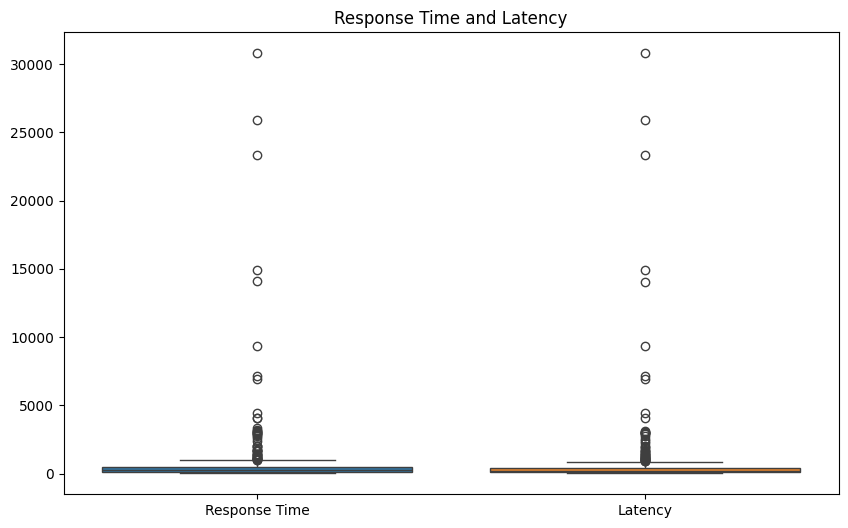

In [6]:
# Boxplots for Response Time and Latency
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_numerical[['Response Time', 'Latency']])
plt.title('Response Time and Latency')
plt.show()

C:\Users\riabreu\AppData\Local\Temp\ipykernel_3472\4024318692.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['1 (Platinum)', '2 (Gold)', '3 (Silver)', '4 (Bronze)'])


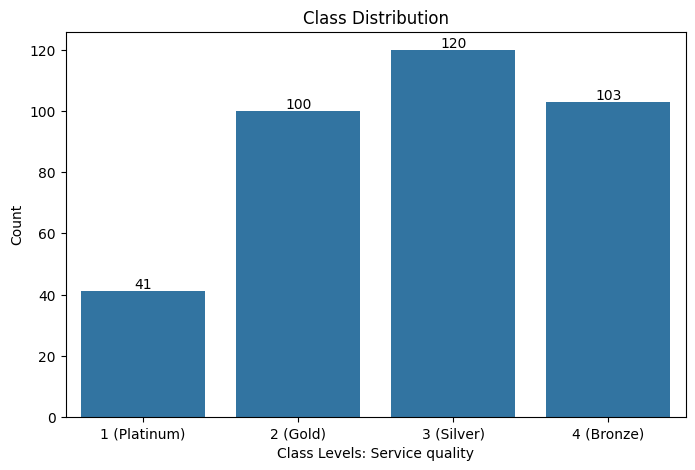

In [8]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(
    x='Class: levels representing service offering qualities (1 through 4)',
    data=df_numerical,
    order=[1, 2, 3, 4]
)

# Add numbers on top of bars
for container in ax.containers:
    ax.bar_label(container)

# Custom X-axis labels
ax.set_xticklabels(['1 (Platinum)', '2 (Gold)', '3 (Silver)', '4 (Bronze)'])

plt.title('Class Distribution')
plt.xlabel('Class Levels: Service quality')
plt.ylabel('Count')
plt.show()

In [10]:
df_num = df_numerical.copy()
df_num.rename(columns={"Class: levels representing service offering qualities (1 through 4)": 'Class qualities', 'WsRF: Web Service Relevancy Function (%)': 'WsRF (%)'}, inplace=True)

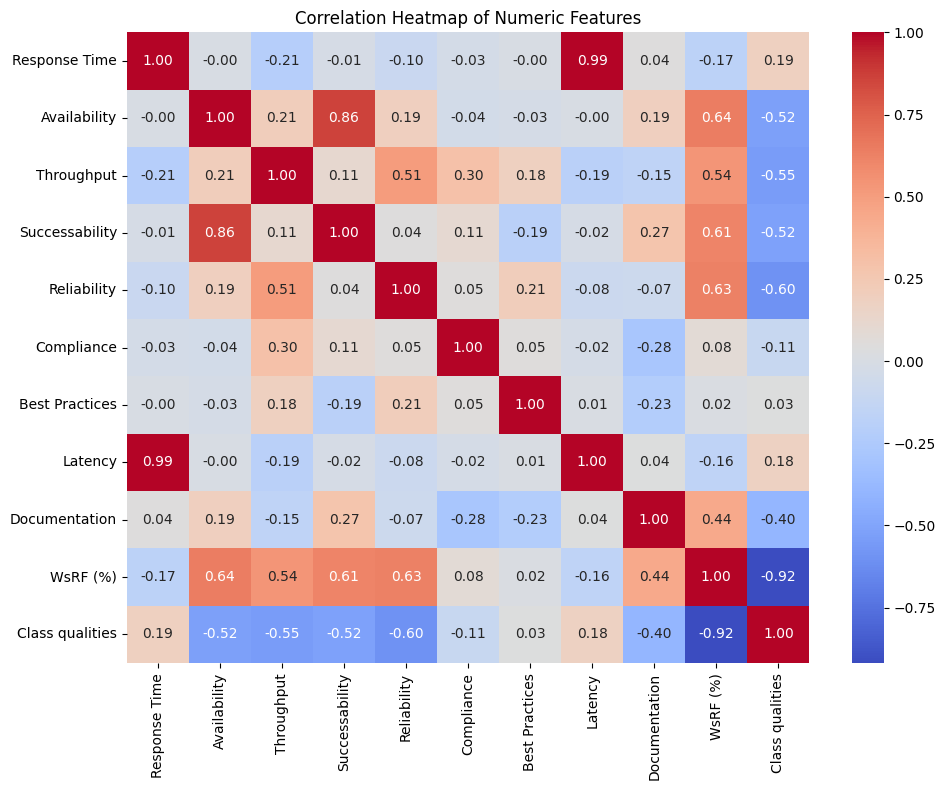

In [11]:
# Compute correlation matrix
corr_matrix = df_num.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Features')
plt.tight_layout()
plt.show()


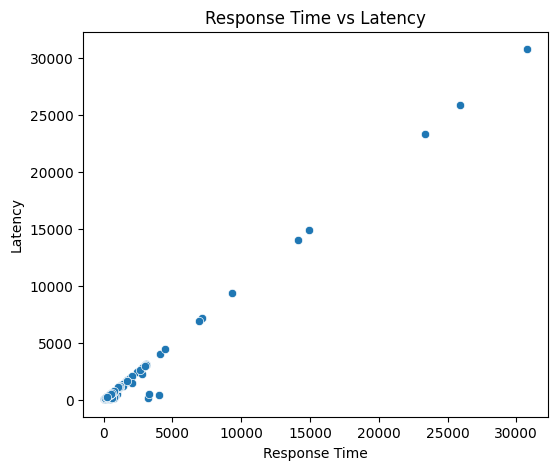

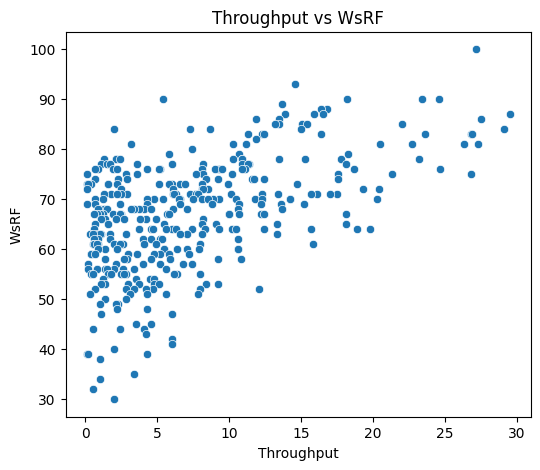

In [13]:
# Response Time vs Latency
plt.figure(figsize=(6, 5))
sns.scatterplot(x='Response Time', y='Latency', data=df_num)
plt.title('Response Time vs Latency')
plt.xlabel('Response Time')
plt.ylabel('Latency')
plt.show()

# Throughput vs WsRF
plt.figure(figsize=(6, 5))
sns.scatterplot(x='Throughput', y='WsRF (%)', data=df_num)
plt.title('Throughput vs WsRF')
plt.xlabel('Throughput')
plt.ylabel('WsRF')
plt.show()

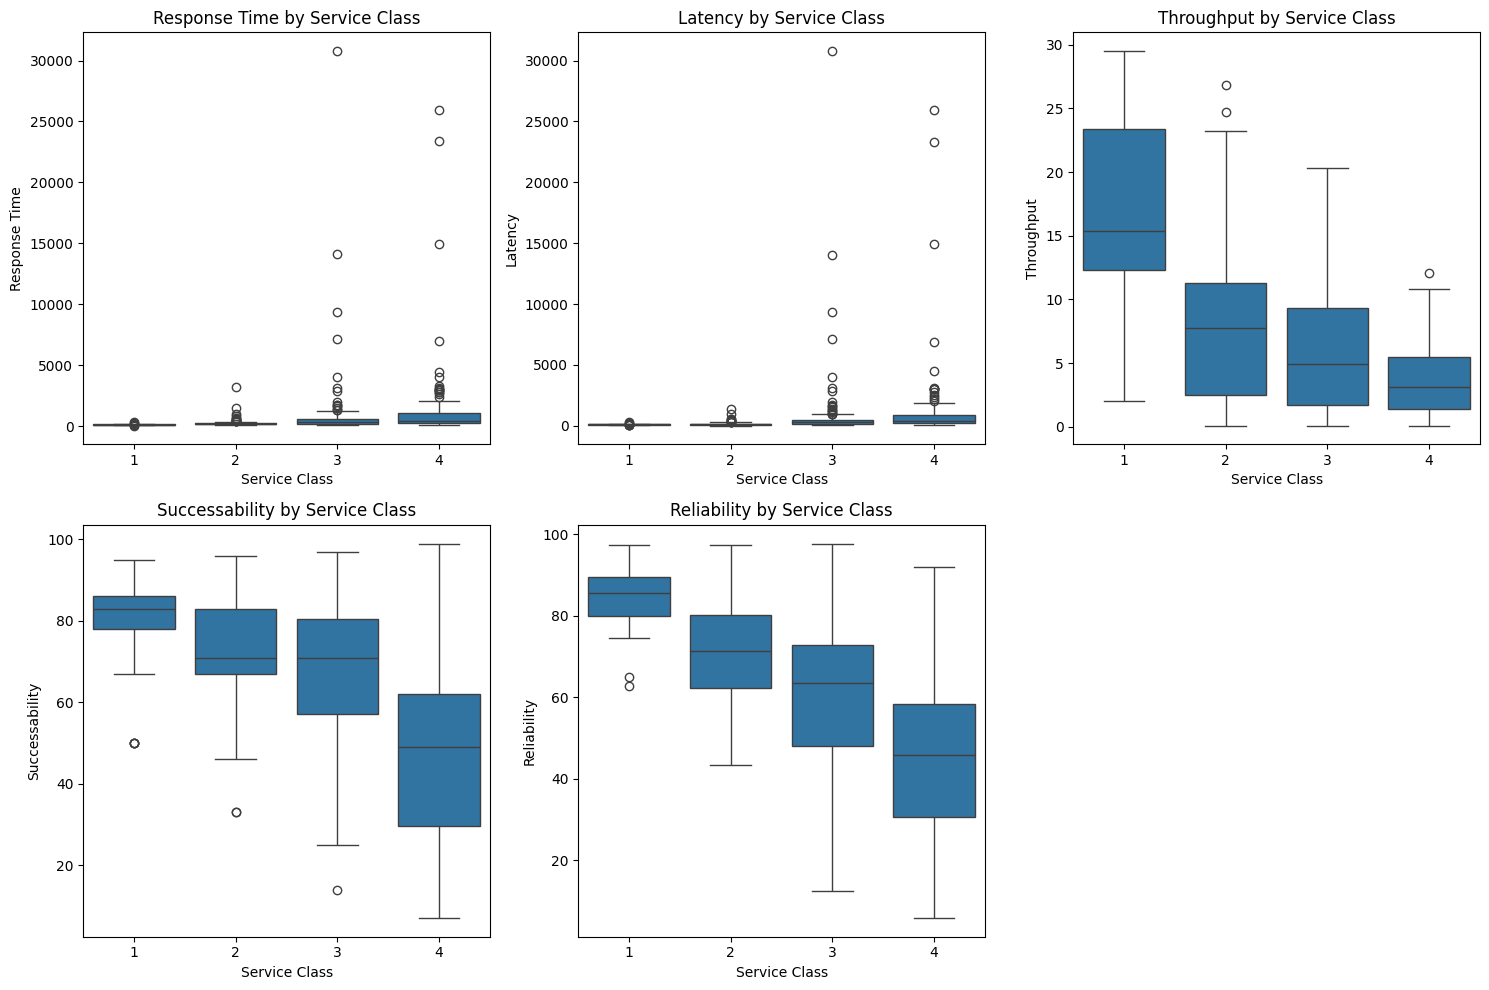

In [17]:
qos_metrics = ['Response Time', 'Latency', 'Throughput', 'Successability', 'Reliability']

plt.figure(figsize=(15, 10))
for i, metric in enumerate(qos_metrics, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='Class qualities', y=metric, data=df_num)
    plt.title(f'{metric} by Service Class')
    plt.xlabel('Service Class')
    plt.ylabel(metric)
plt.tight_layout()
plt.show()

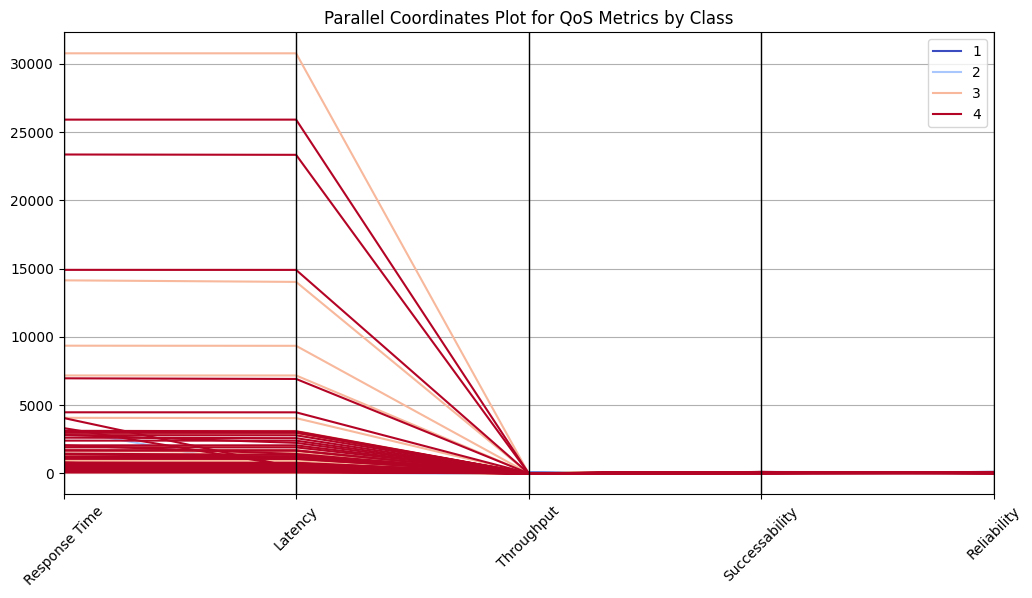

In [21]:
# Select relevant columns + Class
qos_cols = ['Response Time', 'Latency', 'Throughput', 'Successability', 'Reliability']
subset = df[qos_cols + ['Class: levels representing service offering qualities (1 through 4)']]

plt.figure(figsize=(12, 6))
parallel_coordinates(subset, 'Class: levels representing service offering qualities (1 through 4)', colormap='coolwarm')
plt.title('Parallel Coordinates Plot for QoS Metrics by Class')
plt.xticks(rotation=45)
plt.show()
